In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('Titanic dataset.csv')

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data["Age"].fillna(data["Age"].median(skipna=True), inplace=True)
data["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
data['Sex'] = data['Sex'].map({'male':1,'female':0})
data['Embarked'] = data['Embarked'].map({'S':1,'C':0,'Q':2})

In [8]:
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [10]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [12]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2, random_state = 42 )

In [14]:
###########LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=50)
model.fit(x_train,y_train)


c:\Users\mohamed\AI_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [15]:
y_pred = model.predict(x_test) # 50% threshold
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [16]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.91139922, 0.08860078],
       [0.83911496, 0.16088504],
       [0.88417799, 0.11582201],
       [0.20349801, 0.79650199],
       [0.32365084, 0.67634916],
       [0.09183661, 0.90816339],
       [0.29583864, 0.70416136],
       [0.91494187, 0.08505813],
       [0.29270825, 0.70729175],
       [0.18226024, 0.81773976],
       [0.75283439, 0.24716561],
       [0.88711359, 0.11288641],
       [0.44175643, 0.55824357],
       [0.88405153, 0.11594847],
       [0.83681835, 0.16318165],
       [0.14402376, 0.85597624],
       [0.75493927, 0.24506073],
       [0.29568558, 0.70431442],
       [0.83526871, 0.16473129],
       [0.71419417, 0.28580583],
       [0.88471917, 0.11528083],
       [0.75687827, 0.24312173],
       [0.33647474, 0.66352526],
       [0.88293706, 0.11706294],
       [0.87885686, 0.12114314],
       [0.94311872, 0.05688128],
       [0.75250625, 0.24749375],
       [0.83595889, 0.16404111],
       [0.94271305, 0.05728695],
       [0.2922085 , 0.7077915 ],
       [0.

In [17]:
y_pred_edited = y_pred_proba[:,1] >= 0.2
y_pred_edited = y_pred_edited.astype(int)
y_pred_edited

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [19]:
from sklearn import metrics
class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



<Axes: >

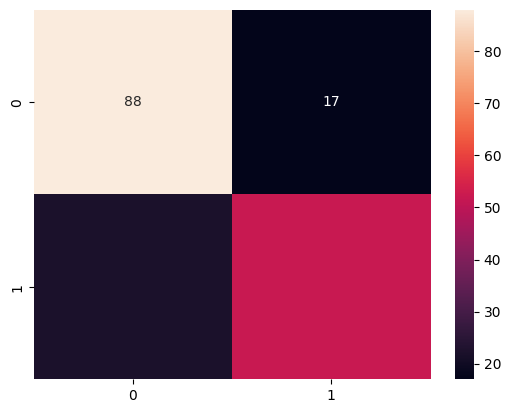

In [20]:
import seaborn as sns

conv_mat = metrics.confusion_matrix(y_test,y_pred)
conv_mat

sns.heatmap(conv_mat,annot=True)

In [21]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')
###############accuracy and performance is low

accuracy = 78.21%
recall = 70.27%
precision = 75.36%
f1_score = 72.73%


In [22]:
##############KNN algorithms
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(x_train,y_train)
y_pred = KNN_model.predict(x_test)
y_pred_proba = KNN_model.predict_proba(x_test)

In [23]:
from sklearn import metrics
class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       105
           1       0.76      0.55      0.64        74

    accuracy                           0.74       179
   macro avg       0.75      0.72      0.72       179
weighted avg       0.75      0.74      0.73       179



<Axes: >

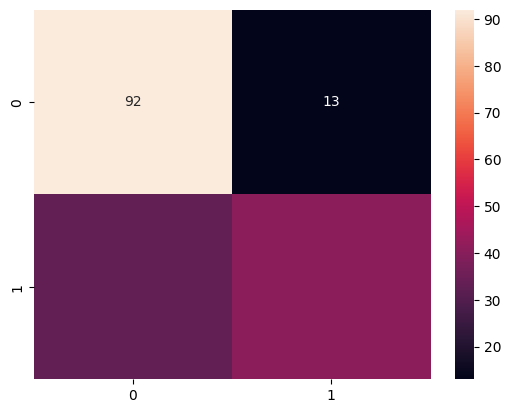

In [24]:
import seaborn as sns
conv_mat = metrics.confusion_matrix(y_test,y_pred)
conv_mat
sns.heatmap(conv_mat,annot=True)

In [25]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)
print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 74.30%
recall = 55.41%
precision = 75.93%
f1_score = 64.06%


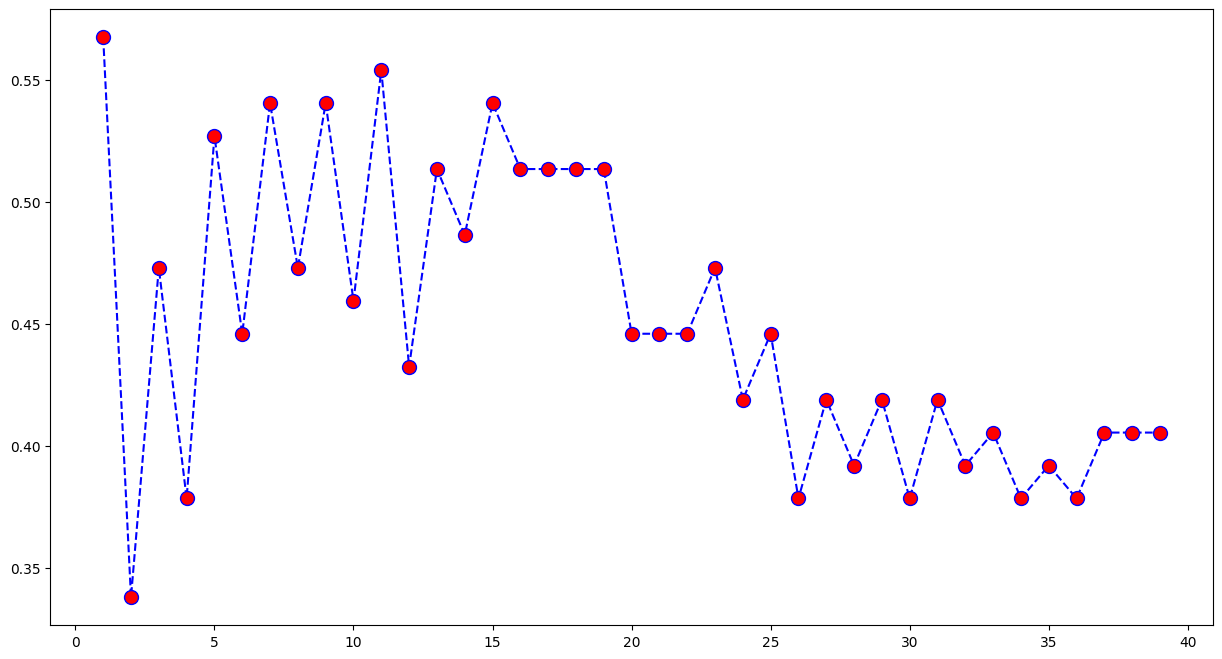

In [26]:
Errors = []
import matplotlib.pyplot as plt
for i in range(1,40):
  KNN_model_temp = KNeighborsClassifier(n_neighbors=i)

  KNN_model_temp.fit(x_train,y_train)

  y_pred_temp = KNN_model_temp.predict(x_test)

  Errors.append(metrics.recall_score(y_test,y_pred_temp))

plt.figure(figsize=(15,8))

plt.plot(range(1,40),Errors,'bo--', markerfacecolor = 'red', markersize = '10' )

In [27]:
#############SVM MODEL
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear',probability=True)
SVM_model.fit(x_train,y_train)
y_pred = SVM_model.predict(x_test)
from sklearn import metrics

class_report = metrics.classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



<Axes: >

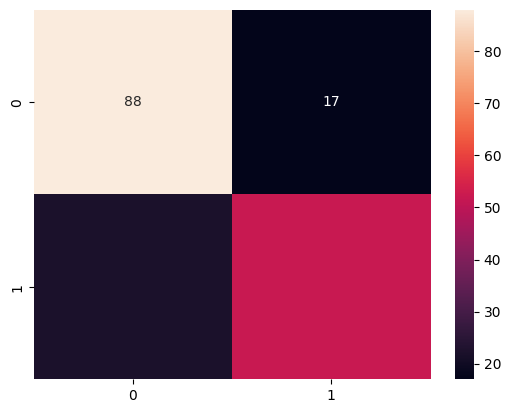

In [28]:
import seaborn as sns

conv_mat = metrics.confusion_matrix(y_test,y_pred)
conv_mat

sns.heatmap(conv_mat,annot=True)

In [29]:
accuracy = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')


accuracy = 78.21%
recall = 70.27%
precision = 75.36%
f1_score = 72.73%


In [30]:
Errors = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  print(i)
  SVM_model_temp = SVC(kernel= i)

  SVM_model_temp.fit(x_train,y_train)

  y_pred_temp = SVM_model_temp.predict(x_test)

  Errors.append(metrics.recall_score(y_test,y_pred_temp))

plt.figure(figsize=(15,8))

plt.plot(range(1,5),Errors,'bo--', markerfacecolor = 'red', markersize = '10' )

linear


KeyboardInterrupt: 

the best model till now is linear logistic

In [31]:
############using decision tree
from sklearn.tree import DecisionTreeClassifier
D_T_model=DecisionTreeClassifier()
D_T_model.fit(x_train,y_train)
y_pred_tree=D_T_model.predict(x_test)
print(metrics.classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.70      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179



In [32]:
accuracy = metrics.accuracy_score(y_test,y_pred_tree)
recall = metrics.recall_score(y_test,y_pred_tree)
precision = metrics.precision_score(y_test,y_pred_tree)
f1_score = metrics.f1_score(y_test,y_pred_tree)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 76.54%
recall = 70.27%
precision = 72.22%
f1_score = 71.23%


THE MODEL TREE classifier is the best 

In [33]:
from sklearn import tree
columns_name=x.columns.tolist()
tree_text=tree.export_text(D_T_model)
print(tree_text)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_2 <= 27.50
|   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |--- feature_5 <= 13.40
|   |   |   |   |   |   |--- feature_5 <= 12.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  12.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  13.40
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |--- feature_5 <= 90.78
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 17.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  17.43
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.50
| 

In [37]:
import graphviz
data_dot=tree.export_graphviz(D_T_model,feature_names=columns_name,filled=True)
tree_figure=graphviz.Source(data_dot,format='png')
tree_figure.render('Tree')


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [38]:
from sklearn.ensemble import RandomForestClassifier
R_F_model=RandomForestClassifier()
R_F_model.fit(x_train,y_train)
y_pred_forrest=R_F_model.predict(x_test)


In [39]:
print(metrics.classification_report(y_test,y_pred_forrest))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [40]:
accuracy = metrics.accuracy_score(y_test,y_pred_forrest)
recall = metrics.recall_score(y_test,y_pred_forrest)
precision = metrics.precision_score(y_test,y_pred_forrest)
f1_score = metrics.f1_score(y_test,y_pred_forrest)

print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 83.80%
recall = 79.73%
precision = 80.82%
f1_score = 80.27%


#Random forrest give us the best performance
        
          linear logistic    kNN model       SVM model        D_tree       Random_forrest
accuracy  78.21%             74.30%           78.21%            76.54%        83.8% 
recall    55.41%             70.27%           70.27%            70.27%        79.73%
precision 75.93%             75.36%           75.36%            72.22%        80.82%
f1_score  64.06%             72.36%           72.73%            71.23%        80.27%
        

Using Ensempling

In [62]:
from sklearn import ensemble
from sklearn.ensemble import VotingClassifier
model1=DecisionTreeClassifier()
model2=SVC()
model3=RandomForestClassifier()
ensemble_model=VotingClassifier(
    estimators=[('OT',model),('SVM',model2),('RF',model3)],
    weights=[4,4,8]
)
ensemble_model.fit(x_train,y_train)


c:\Users\mohamed\AI_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('OT', LogisticRegression(max_iter=50)),
                             ('SVM', SVC()), ('RF', RandomForestClassifier())],
                 weights=[4, 4, 8])

In [63]:
y_pred_vot=ensemble_model.predict(x_test)
print(metrics.classification_report(y_test,y_pred_vot))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [64]:
accuracy = metrics.accuracy_score(y_test,y_pred_forrest)
recall = metrics.recall_score(y_test,y_pred_forrest)
precision = metrics.precision_score(y_test,y_pred_forrest)
f1_score = metrics.f1_score(y_test,y_pred_forrest)
print(f'accuracy = {accuracy:0.2%}')
print(f'recall = {recall:0.2%}')
print(f'precision = {precision:0.2%}')
print(f'f1_score = {f1_score:0.2%}')

accuracy = 83.80%
recall = 79.73%
precision = 80.82%
f1_score = 80.27%


THE same performance as Random Forrest(ensemple model)